___

<h1><center>TRABAJO DE FIN DE GRADO</center></h1>

<center><h1 style="font-weight: normal;">Prolegómenos: Informe de Coyuntura del Municipio de Sevilla</h1></center>

 <pre>




</pre>

<b>Autor:</b> D. Guillermo Vizcaíno Román

<b>Tutor:</b> D. Daniel Oto-Peralías

 <pre>




</pre>

<center><b>Grado en Análisis Económico</b></center>

<center>Facultad de Ciencias Empresariales</center>

<center>Universidad Pablo de Olavide</center>

<center>Curso académico: 2022/2023</center>

<div style="text-align: right">Sevilla, octubre de 2022</div>

In [1]:
import dataframe_image as dfi
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from tabulate import tabulate

# Varios módulos de statsmodels
import statsmodels.api as sm

# Dividir la serie temporal: tendencia, estacionalidad y residuos
from statsmodels.tsa.seasonal import seasonal_decompose

datos = r'C:/Users/guill/OneDrive - Universidad Pablo de Olavide de Sevilla/Universidad/Asignaturas/Cuarto Curso/Trabajo Fin de Grado/Python/Datos/'

plt.style.use('bmh')
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.core.display import HTML
display(HTML("""
<style>
.output {
    display: flex;
    align-items: center;
    text-align: center;
}
</style>
"""))

<hr>

*Índice*

1. [Esquema general de la metodologia](#Esquema)
    
    1.1. [Programación y definición de funciones](#Esquema1)
    
    1.2. [Relleno de valores perdidos o no disponibles](#Esquema2)
<pre>
</pre>

<hr>

> <a id='Esquema'>1. Esquema general de la metodologia</a>

A lo largo de esta sección definiremos las principales prácticas de análisis que hemos usado para la realización de este informe. También mencionar las fuentes de datos han sido principalmente el *Instituto de Estadística y Cartografía de Anadalucía*, entre algunas otras como el *Observatorio ARGOS*, del Servicio Andaluz de Empleo.

<a id='Esquema1'>1.1. Programación y definición de funciones</a>

El principal recurso usado es el lenguaje de programación *Python*, así como distintas librerías de uso libre, tanto para la representación de tablas, como otras que sirven para el cálculo estadístico y de modelaje. El procedimiento ha sido siempre de una forma estructurada dónde definíamos diversas funciones de uso común a lo largo de todas las secciones, como la desestacionalización de las series, el cálculo de las tasas de variación, entre otras. El objetivo de ésto ha sido simplificar y poder poner en práctica herramientas disponibles, las cuales me serán de gran utilidad para futuros análisis.

Otro recurso ha sido el entorno de programación, que en *Python* nos encontramos numerosos entornos (a diferencia de Stata, MATLAB, etc.) que para nosotros el más correcto ha sido *Jupyter Notebook*, un entorno con base en HTML el cuál nos permite poder realizar una estructura de informe al mismo tiempo que estamos programando y realizando los distintos análisis.

<a id='Esquema2'>1.2. Relleno de valores perdidos o no disponibles</a>

Para el relleno de valores perdidos debemos tener en cuenta varios factores, pero entre ello dos resaltan sobre el resto. Primero sería qué cantidad de valores nulos o perdidos tenemos, ya que si contamos con una serie temporal, la cual la mitad de sus valores no los disponemos, tal vez no podamos hacer nada respecto a ello; ya que, independiente de cuál método usemos no encontraremos una forma de rellenarlo de forma eficaz.

Lo segundo sería qué método de rellenado vamos a usar, existen diversas formas y librerías dentro de *Python* donde podemos encontrar métodos lineales, no lineales, por la media o distintos estadísticos sobre el pasado o incluso futuro (si hay valores previos o futuros al valor perdido) sobre la misma serie.

Nosotros vamos a centrarnos en dos de ellos, el lineal y el cudrático para ver cual es la diferencia a nivel visual.

In [19]:
# IMPORTAMOS PRECIOS HOTELEROS PARA PODER IDENTIFICAR CUAL ES EL MEJOR MÉTODO DE RELLENO DE NaNs

precios_hoteles = pd.read_excel(datos + 'Turismo/indice_precios_hoteleros_provincial.xlsx', 'Precios'
                                  , index_col=0, parse_dates=True)

precios_hoteles.index = pd.PeriodIndex(precios_hoteles.index, freq='M')

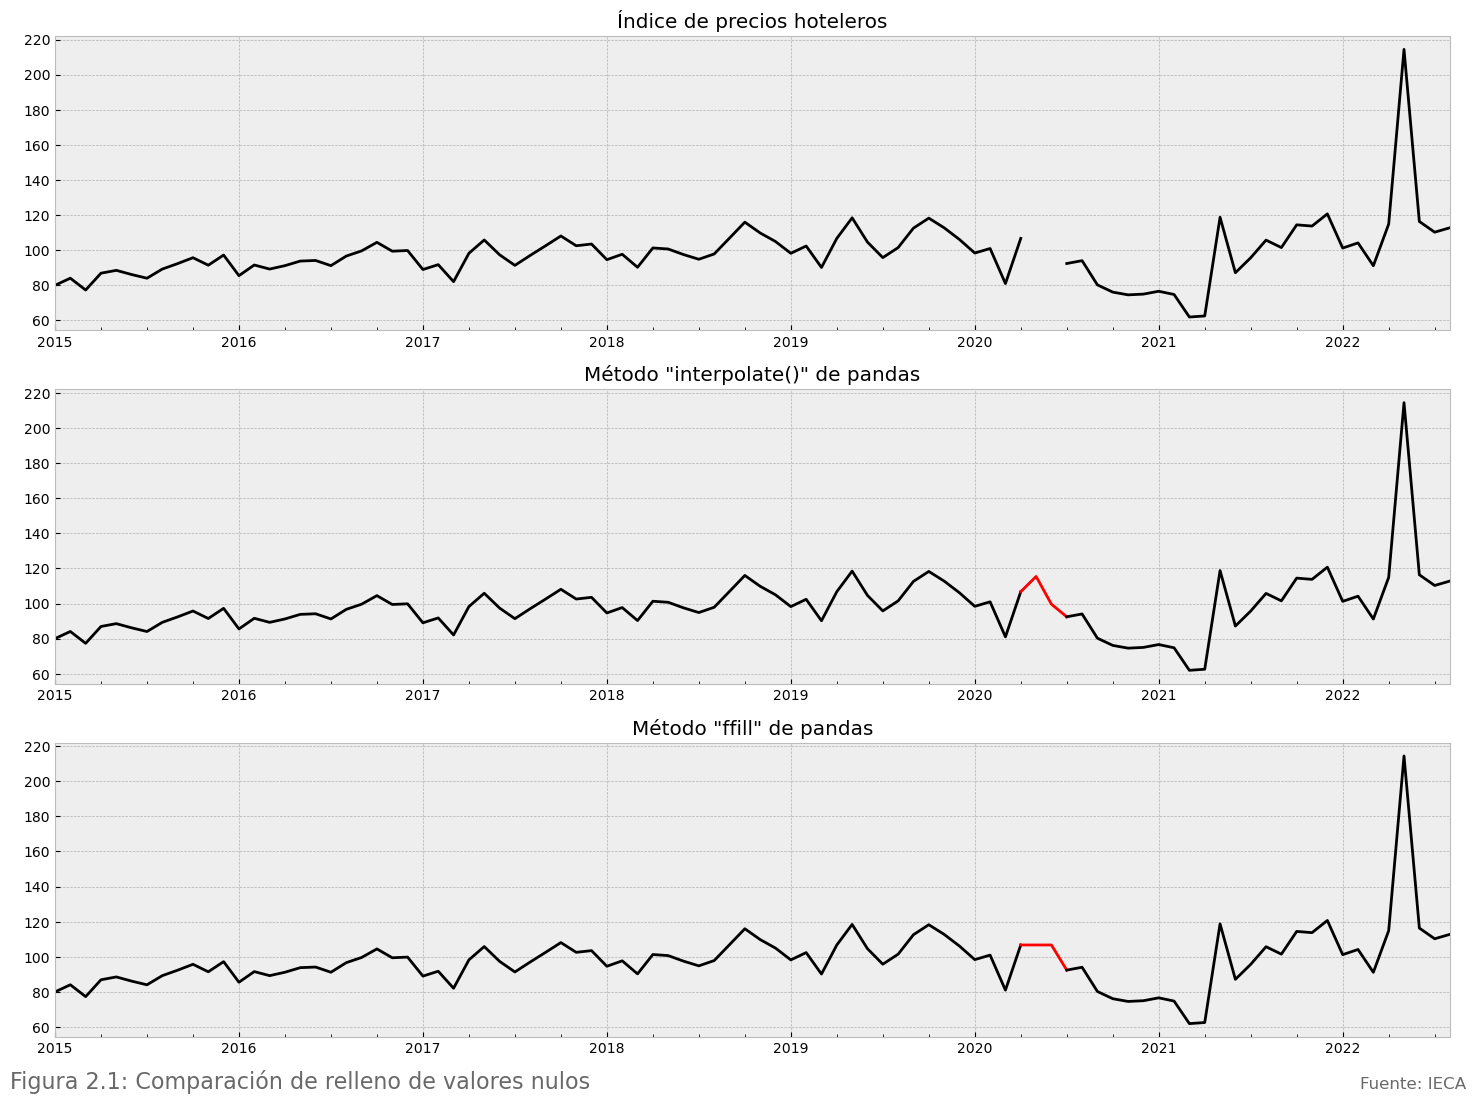

In [23]:
# Comparación de metodología de relleno de missing values

y = precios_hoteles.copy()
y.index = y.index.to_timestamp()
y = y.interpolate(method='polynomial', order=2)
z = precios_hoteles.copy().fillna(method='ffill')

fig, axs = plt.subplots(3, 1,figsize=(18,13))

precios_hoteles.plot(ax=axs[0], color='#000000')
axs[0].set_title('Índice de precios hoteleros')
axs[0].legend().set_visible(False)

y.iloc[:64].plot(ax=axs[1], color='#000000')
y.iloc[63:67].plot(ax=axs[1], color='r')
y.iloc[66:].plot(ax=axs[1], color='#000000')
axs[1].set_title('Método "interpolate()" de pandas')
axs[1].legend().set_visible(False)

z.iloc[:64].plot(ax=axs[2], color='#000000')
z.iloc[63:67].plot(ax=axs[2], color='r')
z.iloc[66:].plot(ax=axs[2], color='#000000')
axs[2].set_title('Método "ffill" de pandas')
axs[2].legend().set_visible(False)

plt.figtext(.82, .07, 'Fuente: IECA', fontsize=12, fontstyle='normal', color='k')
plt.figtext(.82, .05, 'Elaboración propia', fontsize=12, fontstyle='normal', color='k')
plt.figtext(.10, .05, 'Figura P.1: Comparación de relleno de valores nulos'
            , fontsize=16, fontstyle='italic', color='k')

###################
# GUARDAR GRÁFICO #
###################
# plt.savefig('Gráficos/Metodología/grafico21.png', dpi=1200)

plt.show()

Como podemos observar en la figura 2.1, el método "*interpolate()*" usa una aproximación cuadrática, mientras que el método "*ffill()*", utiliza una aproximación lineal, dónde claramente, la primera parece rellenar correctamente la continuidad y estacionalidad del pasado de la serie sobre el índice de precios hoteleros.

___